In [3]:
"""First we import al the datasets and cleand the duplicates"""
import pandas as pd
COM = pd.read_excel('2223MBD41_Project_Dataset-v01.xlsx',sheet_name= 'COMPANY')
INV = pd.read_excel('2223MBD41_Project_Dataset-v01.xlsx',sheet_name= 'INVESTMENT')
ACQ = pd.read_excel('2223MBD41_Project_Dataset-v01.xlsx',sheet_name= 'ACQUISITION')
EMP = pd.read_excel('2223MBD41_Project_Dataset-v01.xlsx',sheet_name= 'EMPLOYEE')
COM.drop_duplicates()
INV.drop_duplicates()
ACQ.drop_duplicates()
EMP.drop_duplicates()


,EMPLOYEE_MD5,JOB_TITLES,COMPANY_NAME,ATTENDED_SCHOOLS
0,aac4a9fe0edc50a77072eae64578a892,CEO,Twitter,NaN
1,f9c87bcba2ffe2237e039b2e2c86b16f,Co-Founder,Twitter,Northeastern University University of Massach...
2,36830ffebad9a630da8a7a03a45f2730,Team Member,Twitter,NaN
3,84a91ad0f9b4149759f47fdc949fed42,General Counsel,Twitter,Cornell University New York University School...
4,7881769fc62f54c36a687bda02b66198,"VP, Trust & Safety",Twitter,NaN
...,...,...,...,...
20697,72c32150cb3f9b6e806fa530ed610175,Chairman and CEO,Iberdrola,NaN
20698,dd0ae519effadbef7559d299ad355f1f,Digital Channels Specialist Web Analyst,Iberdrola,EAE Business School
20699,aae97cfe2ea38ca0609a341e984b6b57,CEO,JD Logistics,NaN
20700,b8a8c88bce6444121ebce4ef8d41a204,Data Scientist,Keywords Studios,NaN


# Sección nueva

In [4]:
"""We check the first data set. Noticed all the data is not numeric.
1000 companies with 9 categories of revenu range and 10 categories of employee number """
COM.describe(include='all').T 

,count,unique,top,freq
COMPANY_NAME,1000,1000,Twitter,1
CATEGORY,1000,977,"Biotechnology, Health Care, Medical, Pharmaceu...",5
LOCATION,1000,255,"San Francisco, California, United States",173
FOUNDED_ON,1000,428,2012,55
EXITED_ON,1000,269,—,678
CLOSED_ON,1000,6,—,995
REVENU_RANGE,1000,9,$1M to $10M,230
EMPLOYEE_NUMBER,1000,10,101-250,196


In [4]:
"""The distribution of the REVENU_RANGE concentrate almost 50% of the companies in the ranges $1M to $10M  and $10M to $50M  .
Only 4% of the sample are $10B+ . We notice also some cases with — ( No data)  """

COM['REVENU_RANGE'].value_counts(normalize=True)


$1M to $10M       0.230
$10M to $50M      0.216
$100M to $500M    0.166
$50M to $100M     0.103
$1B to $10B       0.077
Less than $1M     0.073
$500M to $1B      0.047
—                 0.046
$10B+             0.042
Name: REVENU_RANGE, dtype: float64

In [40]:
"""The distribution of the EMPLOYEE_NUMBER concentrate almost 40% of the companies in the ranges 101-250  and 251-500 .
 We also notice also some cases with — ( No data)  """
COM['EMPLOYEE_NUMBER'].value_counts(normalize=True)

101-250       0.196
251-500       0.156
1001-5000     0.155
11-50         0.124
501-1000      0.119
51-100        0.095
10001+        0.095
5001-10000    0.033
1-10          0.025
—             0.002
Name: EMPLOYEE_NUMBER, dtype: float64

In [6]:
"""We check the first data set. Noticed all the data is not numeric.
5937 investment with 5 investment_stage and 28 categories of FUNDING_TYPE """
INV.describe(include='all').T 

,count,unique,top,freq
COMPANY_NAME,5937,935,Tesla,36
FUNDING_TYPE,5937,28,Series A,854
MONEY_RAISED,5937,1210,—,1028
ANNOUNCED_DATE,5937,2331,"Dec 8, 2020",25
INVESTMENT_STAGE,5937,5,—,1766


In [41]:
"""The distribution of the INVESTMENT_STAGE concentrate almost 50% of the companies in the EARLY and Late stage Venture .
 We also notice the cases with  — ( No data) concentrate 29%. Low concentration for Seed and Pirvate Equity """
INV['INVESTMENT_STAGE'].value_counts(normalize=True)

—                      0.297457
Early Stage Venture    0.261917
Late Stage Venture     0.251305
Seed                   0.160687
Private Equity         0.028634
Name: INVESTMENT_STAGE, dtype: float64

In [5]:
"""The objective is to transform de MONEY_RAISED into numeric data. First we delete al the null values """

INV2 = INV.loc[INV["MONEY_RAISED"] != "—"]
INV2.describe(include='all').T 


,count,unique,top,freq
COMPANY_NAME,4909,926,Tesla,35
FUNDING_TYPE,4909,28,Series A,772
MONEY_RAISED,4909,1209,"$10,000,000",140
ANNOUNCED_DATE,4909,2108,"Dec 10, 2020",24
INVESTMENT_STAGE,4909,5,Early Stage Venture,1434


In [7]:
"""The objective is to transform de MONEY_RAISED into numeric data. With the formula we transform
 to numbers and we transform all to USD  """

def GetDollar(x):
    if   x[0] == '€' :
       return(float(str(x[1:]).replace(",", ""))*1.06)
    elif x[0:3] == "CA$" :
       return(float(str(x[3:]).replace(",", ""))*0.74)
    elif x[0] == "¥" :
       return(float(str(x[1:]).replace(",", ""))*0.0075)
    elif x[0:2] == "R$" :
       return(float(str(x[2:]).replace(",", ""))*0.1895)
    elif x[0:3] == "CN¥" :
       return(float(str(x[3:]).replace(",", ""))*0.143676)
    elif x[0:3] == "ZAR" :
       return(float(str(x[3:]).replace(",", ""))*0.058)
    elif x[0:3] == "SGD" :
       return(float(str(x[3:]).replace(",", ""))*0.74)
    elif x[0:2] == "A$" :
       return(float(str(x[2:]).replace(",", ""))*0.67)
    elif x[0] == "₩" :
       return(float(str(x[1:]).replace(",", ""))*0.00079)
    elif x[0:3] == "CHF" :
       return(float(str(x[3:]).replace(",", ""))*1.8)
    elif x[0:3] == "MYR" :
       return(float(str(x[3:]).replace(",", ""))*0.23)
    elif x[0:3] == "RUB" :
       return(float(str(x[3:]).replace(",", ""))*0.014)
    elif x[0] == "₹" :
       return(float(str(x[1:]).replace(",", ""))*0.012)
    elif x[0:3] == "SEK" :
       return(float(str(x[3:]).replace(",", ""))*0.95)
    else:
      return(float(str(x[1:]).replace(",", "")))
  

In [8]:
"""We create 'M_R_USD' to express the money raised in USD in a numeric form.
We notice de average amount of money raised was $133,805,088."""
INV2['M_R_USD'] = INV2['MONEY_RAISED'].apply(GetDollar).round()
INV2.describe(include='all').T 

<ipython-input-8-fe964e064f73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  INV2['M_R_USD'] = INV2['MONEY_RAISED'].apply(GetDollar).round()


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
COMPANY_NAME,4909,926,Tesla,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FUNDING_TYPE,4909,28,Series A,772,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONEY_RAISED,4909,1209,"$10,000,000",140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANNOUNCED_DATE,4909,2108,"Dec 10, 2020",24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INVESTMENT_STAGE,4909,5,Early Stage Venture,1434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M_R_USD,4909.0,NaN,NaN,NaN,133805088.28682,522589158.53715,6500.0,4999998.0,20000000.0,75000000.0,14000000000.0


In [9]:
"""Here is the top 5 MONEY_RAISED ranking. Leading is ANT Group with colecting in it´s Series C $14,000,000,000"""

import numpy as np
INV3 = INV2.sort_values(['M_R_USD'],ascending=[False])
INV3.head()

,COMPANY_NAME,FUNDING_TYPE,MONEY_RAISED,ANNOUNCED_DATE,INVESTMENT_STAGE,M_R_USD
5038,Ant Group,Series C,"$14,000,000,000","Jun 8, 2018",Late Stage Venture,1.400000e+10
3726,Facebook,Post-IPO Equity,"$13,787,117,488","Oct 20, 2014",—,1.378712e+10
5064,BP,Post-IPO Debt,"$12,000,000,000","Jun 18, 2020",—,1.200000e+10
153,Meituan,Post-IPO Equity,"$6,588,000,000","Apr 19, 2021",—,6.588000e+09
5739,Sberbank,Post-IPO Debt,"$5,800,000,000","Jul 7, 2014",—,5.800000e+09


In [10]:
"""Here is the top 10 of total MONEY_RAISED ranking. 
Leading is Reliance Jio Group with with a total of $2.444016e+10 colected in 15 rounds.
It interesting to see thath 50% of the ranking colected their total in 5 rounds or less"""
INV4 = INV2.groupby('COMPANY_NAME').agg({'M_R_USD': [np.sum, np.max, np.min, np.count_nonzero]})
INV5 = INV4.sort_values([('M_R_USD', 'sum')], ascending=False).head(10)
INV5

M_R_USD                                          
                       sum          amax          amin count_nonzero
COMPANY_NAME                                                        
Reliance Jio  2.444016e+10  5.228880e+09  8.760000e+07            15
Tesla         2.298710e+10  2.700000e+09  7.500000e+06            35
Facebook      1.950962e+10  1.378712e+10  1.500000e+07            15
Ant Group     1.850000e+10  1.400000e+10  4.500000e+09             2
Meituan       1.728800e+10  6.588000e+09  4.000000e+08             5
Uber          1.721370e+10  3.500000e+09  2.000000e+05            20
Didi          1.565080e+10  5.500000e+09  2.000000e+06            15
BP            1.200000e+10  1.200000e+10  1.200000e+10             1
Sberbank      1.160000e+10  5.800000e+09  5.800000e+09             2
Siemens       8.912900e+09  4.452000e+09  8.900000e+06             3

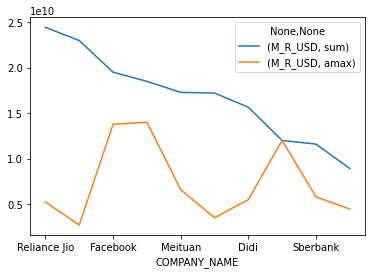

In [11]:
"""Here is a plot line the top 10 of total MONEY_RAISED and the max amount colected in one round. 
It interesting to see that in the top 3 the max amount is not relevant to the total amount colected.
Also interesting to see that in some cases of  the ranking the max amount is almost all the amount colected
There isn´t a strict correlation """
INV5[[('M_R_USD', 'sum'),('M_R_USD', 'amax')]].plot.line()

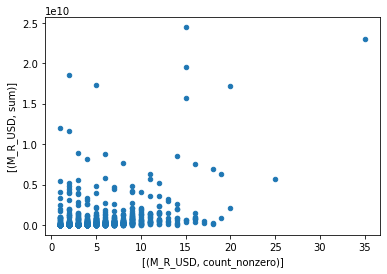

In [12]:
"""In the flowwing plot scatter we compare the total amount raised with the number of funding stages.
Regardlees the company with most money raised is the company with highest investment rounds ,
We see there is not a clear correlation between this two variables. 
We see a lot of companies with high number of investment rounds and low total money raised, and viceversa.
 """

INV4.plot.scatter(x= [('M_R_USD', 'count_nonzero')], y = [('M_R_USD', 'sum')])

In [45]:
"""If we group the M_R_USD by FUNDING_TYPE we notice the most frequent are SERIES A,B and C.
The top 3 of highest total colected are Post-IPO Equity,Post-IPO Debt and Private Equity.
Meanwhile the top 3 of higest average colected are Post-IPO Secondary,Post-IPO Debt and Post-IPO Equity.
 """

INV6 = INV2.groupby('FUNDING_TYPE').agg({'M_R_USD': [np.sum, np.mean, np.max, np.min, np.count_nonzero]})
INV6.sort_values([('M_R_USD', 'count_nonzero')], ascending=False)

M_R_USD                              \
                                   sum          mean          amax   
FUNDING_TYPE                                                         
Series A                  2.137393e+10  2.768644e+07  2.054567e+09   
Series B                  2.931778e+10  4.428667e+07  4.500000e+09   
Series C                  5.365400e+10  9.773043e+07  1.400000e+10   
Seed                      2.083618e+09  3.872895e+06  1.000000e+09   
Venture - Series Unknown  3.882314e+10  1.072462e+08  3.300000e+09   
Series D                  3.902133e+10  1.111719e+08  1.400000e+09   
Series E                  4.110088e+10  1.599256e+08  1.500000e+09   
Debt Financing            2.975907e+10  1.322625e+08  2.000000e+09   
Post-IPO Equity           1.072456e+11  5.499772e+08  1.378712e+10   
Series F                  3.316825e+10  2.319458e+08  4.000000e+09   
Private Equity            7.204112e+10  5.182814e+08  5.500000e+09   
Grant                     4.366330e+09  5.077128e+07  1.600000e+09   
Post-IPO Debt             8.388809e+10  1.035655e+09  1.200000e+10   
Pre-Seed                  2.725625e+07  3.539772e+05  2.700000e+06   
Corporate Round           3.666688e+10  4.954984e+08  5.228880e+09   
Series G                  1.694313e+10  2.647364e+08  3.500000e+09   
Angel                     7.499975e+07  1.209673e+06  1.000000e+07   
Convertible Note          3.642194e+09  6.389813e+07  2.400000e+09   
Secondary Market          7.968410e+09  1.448802e+08  2.000000e+09   
Equity Crowdfunding       2.482259e+08  5.516130e+06  5.654358e+07   
Funding Round             3.921870e+09  1.120534e+08  1.000000e+09   
Series H                  8.898700e+09  2.966233e+08  1.096300e+09   
Initial Coin Offering     4.542700e+09  4.129727e+08  4.100000e+09   
Series J                  2.284939e+09  2.284939e+08  8.000000e+08   
Post-IPO Secondary        1.459822e+10  1.622024e+09  3.135000e+09   
Series I                  1.174140e+09  1.304600e+08  2.140000e+08   
Product Crowdfunding      1.403200e+07  2.338667e+06  1.100000e+07   
Non-equity Assistance     3.855000e+05  7.710000e+04  1.855000e+05   

                                                    
                                amin count_nonzero  
FUNDING_TYPE                                        
Series A                     32000.0           772  
Series B                    673000.0           662  
Series C                     85000.0           549  
Seed                         15900.0           538  
Venture - Series Unknown    106664.0           362  
Series D                    178800.0           351  
Series E                    438942.0           257  
Debt Financing               25000.0           225  
Post-IPO Equity             241000.0           195  
Series F                   8040000.0           143  
Private Equity             2000000.0           139  
Grant                         6500.0            86  
Post-IPO Debt              1800000.0            81  
Pre-Seed                     15900.0            77  
Corporate Round             200000.0            74  
Series G                  10000000.0            64  
Angel                        40000.0            62  
Convertible Note             20000.0            57  
Secondary Market            800000.0            55  
Equity Crowdfunding          33982.0            45  
Funding Round               300000.0            35  
Series H                  20000000.0            30  
Initial Coin Offering      1300000.0            11  
Series J                   5100000.0            10  
Post-IPO Secondary         1060000.0             9  
Series I                  39740000.0             9  
Product Crowdfunding        100000.0             6  
Non-equity Assistance        50000.0             5

In [14]:
"""We check the third data set. Noticed all the data is not numeric.
5289 acquisitions with 497 unique buyers and 106 categories of ACQUISITION_TYPE	 """

ACQ.describe(include='all').T 

,count,unique,top,freq
COMPANY_NAME,5289,497,Microsoft,235
ACQUIREE_NAME,5289,4167,Fastlane,4
ANNOUNCED_DATE,5289,2691,"May 6, 2021",16
PRICE,5289,560,—,3949
ACQUISITION_TYPE,5289,6,Acquisition,4087


In [15]:
"""The Top Ten companies with most acquistions.
Microsoft , Cisco and Google fighting realy close to get the top1 """
ACQ2 = ACQ.groupby('COMPANY_NAME').agg({'ACQUIREE_NAME': np.count_nonzero})
ACQ3 = ACQ2.sort_values([('ACQUIREE_NAME')], ascending=False).head(10)
ACQ3

,ACQUIREE_NAME
COMPANY_NAME,
Microsoft,235
Cisco,233
Google,230
Accenture,215
EQT,175
IBM,172
Oracle,123
Apple,113
Intel,97


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


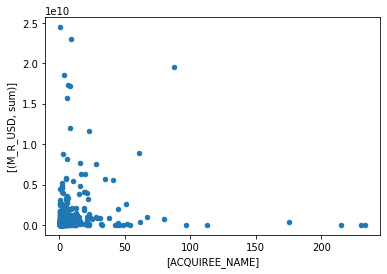

In [58]:
"""In the flowwing plot scatter we compare the total amount raised with the number of accquistion made.
We notice there is not direct correlation between thesse two variables.
The explanation can be that the companies with more accquisition are big companies
wich are consolidated and aren´t raising funds. By the other hand companies with high number of money 
raised are young companies and haven´t make much accquisitions.
 """

INAC = INV4.merge(ACQ2 ,on = 'COMPANY_NAME', how= 'left')
INAC.plot.scatter(x= [('ACQUIREE_NAME')], y = [('M_R_USD', 'sum')])

In [72]:
"""Here we want to validate the past conclusion , by aggruping the accqusitions numbers whith the revenu_range of companies.
We can see the companies with $10B+ REVENU_RANGE had both the highest average and total acquistions.
We see a correlation between Revenu_range and accquisiton mean and sum.
 """

COMA = COM.merge(ACQ2 ,on = 'COMPANY_NAME', how= 'left')
COMA2 = COMA.groupby('REVENU_RANGE').agg({'ACQUIREE_NAME': [np.mean,np.sum, np.max, np.min, np.count_nonzero]})
COMA3 = COMA2.sort_values([('ACQUIREE_NAME','mean')], ascending=False)
COMA3


ACQUIREE_NAME                                  
                        mean     sum   amax amin count_nonzero
REVENU_RANGE                                                  
$10B+              40.250000  1449.0  233.0  1.0            42
$1B to $10B        21.031746  1325.0  235.0  1.0            77
$500M to $1B       11.583333   417.0   80.0  1.0            47
$100M to $500M      7.066667   848.0  175.0  1.0           166
$10M to $50M        6.115385   636.0  215.0  1.0           216
$50M to $100M       5.500000   341.0   52.0  1.0           103
$1M to $10M         3.965517   230.0   62.0  1.0           230
Less than $1M       2.833333    34.0    7.0  1.0            73
—                   1.500000     9.0    3.0  1.0            46

In [34]:
"""We check the Employee data set. Noticed all the data is not numeric.
20702 Employees in 964 comapines,  12308 different JOB_TITLES and 2973 who ATTENDED_SCHOOLS.
The most common job tittle is Software Engineer and the most attended_school is Stanford	 """

EMP.describe(include='all').T 

,count,unique,top,freq
EMPLOYEE_MD5,20702,20702,aac4a9fe0edc50a77072eae64578a892,1
JOB_TITLES,20702,12308,Software Engineer,510
COMPANY_NAME,20702,964,Microsoft,1756
ATTENDED_SCHOOLS,6584,2973,Stanford University,159


In [36]:
"""The Top Ten companies with employees which attended schools.
Microsoft and Google leading with an a important distance.
All companies are tech-companies """

EMP2 = EMP.groupby('COMPANY_NAME').agg({'ATTENDED_SCHOOLS': np.count_nonzero})
EMP3 = EMP2.sort_values([('ATTENDED_SCHOOLS')], ascending=False).head(10)
EMP3

,ATTENDED_SCHOOLS
COMPANY_NAME,
Microsoft,1756
Google,1598
Facebook,636
Intel,626
IBM,593
Cisco,474
SAP,394
Accenture,316
Uber,291


In [78]:
"""69 out of 157 CEO attended to schools.
Each of them attended to different schools"""

EMP4 = EMP[(EMP['JOB_TITLES']=='CEO')]
EMP4.describe(include='all').T 

,count,unique,top,freq
EMPLOYEE_MD5,157,157,aac4a9fe0edc50a77072eae64578a892,1
JOB_TITLES,157,1,CEO,157
COMPANY_NAME,157,154,Microsoft,2
ATTENDED_SCHOOLS,69,69,Indian Institute of Technology Kharagpur Stan...,1


In [73]:
"""The final table we group by REVENU_RANGE	the mean: 
M_R_USD (money colected) and ATTENDED_SCHOOLS
There is a positive relation between revenu_range and the mean 
of the attended_schools.
 """

COMAE = COMA.merge(EMP2 ,on = 'COMPANY_NAME', how= 'left')
COMAEI = COMAE.merge(INV2 ,on = 'COMPANY_NAME', how= 'left')
COMAEI2 = COMAEI.groupby('REVENU_RANGE').agg({'M_R_USD': [np.mean],
                                              'ATTENDED_SCHOOLS': [np.mean],
                                            })
COMAEI3 = COMAEI2.sort_values([('M_R_USD','mean')], ascending=False)
COMAEI3 

,M_R_USD,ATTENDED_SCHOOLS
,mean,mean
REVENU_RANGE,,
$10B+,7.120653e+08,249.586207
$1B to $10B,4.365372e+08,43.329231
$500M to $1B,3.064585e+08,17.659498
$100M to $500M,1.503932e+08,17.797841
$50M to $100M,9.262683e+07,10.703226
$10M to $50M,7.522459e+07,10.238715
$1M to $10M,3.570581e+07,5.696629
—,3.283981e+07,4.087912
